In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
img_rows, img_cols = 28, 28
num_classes = 10

def data_prep(raw):
    out_y = tf.keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [ ]:
train_file = "/content/train.csv"

raw_train = pd.read_csv(train_file)


In [ ]:
raw_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
raw_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
raw_train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [ ]:
X, y = data_prep(raw_train)

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, kernel_size=(7,7), activation='relu', padding='same', input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy']) 

In [ ]:
EPOCHS=20
checkpoint='/content/checkpoint'
model_checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(X_train, y_train,
          batch_size=128,
          epochs=EPOCHS,
          callbacks=[model_checkpoint_callback],
          validation_data=(X_valid, y_valid))

Epoch 1/20
263/263 [==============================] - 7s 16ms/step - loss: 0.3780 - accuracy: 0.8817 - val_loss: 0.0579 - val_accuracy: 0.9805
Epoch 2/20
263/263 [==============================] - 4s 16ms/step - loss: 0.1047 - accuracy: 0.9737 - val_loss: 0.0480 - val_accuracy: 0.9856
Epoch 3/20
263/263 [==============================] - 4s 14ms/step - loss: 0.0697 - accuracy: 0.9818 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 4/20
263/263 [==============================] - 3s 13ms/step - loss: 0.0540 - accuracy: 0.9860 - val_loss: 0.0385 - val_accuracy: 0.9886
Epoch 5/20
263/263 [==============================] - 4s 16ms/step - loss: 0.0424 - accuracy: 0.9890 - val_loss: 0.0322 - val_accuracy: 0.9907
Epoch 6/20
263/263 [==============================] - 3s 13ms/step - loss: 0.0445 - accuracy: 0.9881 - val_loss: 0.0420 - val_accuracy: 0.9885
Epoch 7/20
263/263 [==============================] - 3s 13ms/step - loss: 0.0330 - accuracy: 0.9913 - val_loss: 0.0368 - val_accuracy: 0.9912

In [ ]:
model.load_weights(checkpoint)

model.evaluate(X_valid,y_valid,batch_size=128)

66/66 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9929


[0.028760096058249474, 0.9928571581840515]

In [ ]:
path_test = "/content/test.csv"
raw_test = pd.read_csv(path_test)
X_test = raw_test.to_numpy()
X_test = X_test/.255 
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)

263/263 [==============================] - 1s 2ms/step


               precision    recall  f1-score   support

           0       1.00      0.99      0.99       796
           1       0.99      1.00      1.00       946
           2       0.99      1.00      0.99       856
           3       0.99      1.00      0.99       856
           4       1.00      0.99      0.99       826
           5       0.99      0.99      0.99       773
           6       1.00      0.99      0.99       787
           7       0.99      0.99      0.99       869
           8       0.99      0.99      0.99       836
           9       0.99      1.00      0.99       855

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400
 




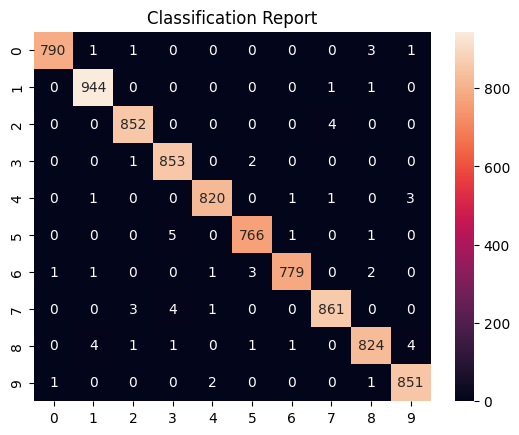

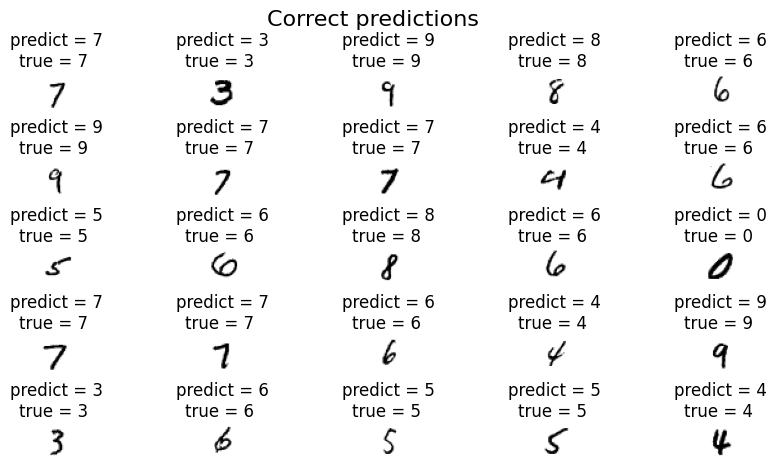

In [ ]:
y_pred_10_D = model.predict(X_valid)
y_pred_1D = np.argmax(y_pred_10_D,axis = 1)
y_test_1D = np.argmax(y_valid,axis = 1)

# classification report
print('\n\n',classification_report(y_test_1D , y_pred_1D), '\n\n')

# confusion matrix
sns.heatmap(confusion_matrix(y_test_1D , y_pred_1D), annot=True, fmt='d')
plt.title('Classification Report')
plt.show()

print('\n\n')

# plot digits
t = y_test_1D == y_pred_1D
good_pred = np.where(t==True)

solutions = []

plt.figure(figsize=(10,5))

j = 1
for i in good_pred[0][:25]:    
    plt.subplot(5, 5, j)
    plt.imshow(X_valid[i].reshape((28,28)),cmap=plt.cm.binary) 
    
    solutions.append(y_test_1D[i])
    
    plt.title("predict = {}\ntrue = {} ".format(y_pred_1D[i], y_test_1D[i]))
    plt.axis('off')      
    j+=1

    plt.subplots_adjust(wspace= 0.5, hspace= 1.5)

plt.suptitle('Correct predictions \n', fontsize=16,y=1.01)
plt.show()